<a href="https://colab.research.google.com/github/htcysl/Machine-Learning-/blob/main/Hatice_Uysal_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s generate some data on the plane with some amount of noise

In [ ]:
import numpy as np

In [ ]:
n = 500

x1 = 3 * np.random.rand(n, 1) - 1
x2 = 3 * np.random.rand(n, 1) - 1
X = np.concatenate((x1, x2), axis=1)

In [ ]:
X

array([[-0.70786049,  1.12591829],
       [ 1.72582567,  1.36707536],
       [-0.31651378,  0.80109835],
       [ 0.7830463 ,  0.67147921],
       [ 1.91895726,  0.27766053],
       [-0.864688  , -0.90260388],
       [ 0.85468021, -0.29298511],
       [ 0.47550333, -0.38955102],
       [ 1.58683021,  0.51888412],
       [ 0.54354135,  1.09364293],
       [-0.99803794, -0.94411593],
       [ 0.54237845, -0.18047807],
       [-0.47040468,  0.16799518],
       [ 1.03648269,  0.33127339],
       [ 0.69128646, -0.15800689],
       [-0.8081912 ,  1.25227081],
       [-0.97463741,  0.9062397 ],
       [ 1.11607058,  0.46478279],
       [-0.87184012,  1.18602481],
       [ 1.36139417, -0.40523043],
       [ 0.37550319,  1.65406223],
       [ 1.50664336,  0.97110107],
       [ 0.83359238,  1.31404298],
       [-0.50960881, -0.12508044],
       [ 0.03864964,  0.43492895],
       [ 0.52431188,  1.51300402],
       [ 1.9381077 ,  0.09290231],
       [-0.98547872,  0.19792108],
       [-0.6722715 ,

Let's put input data, X, into a matrix-form

In [ ]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((n, 1)), X]

X_b

array([[ 1.        , -0.70786049,  1.12591829],
       [ 1.        ,  1.72582567,  1.36707536],
       [ 1.        , -0.31651378,  0.80109835],
       ...,
       [ 1.        ,  0.05844001, -0.52129641],
       [ 1.        ,  0.53149815, -0.09621797],
       [ 1.        , -0.76706997, -0.83538203]])

In [ ]:
A = 3
B = 2
C = 1
D = 10

print("Plane parameters:  A =", A, ", B =", B, ", C =", C, ", D =", D)

Plane parameters:  A = 3 , B = 2 , C = 1 , D = 10


y values are generated on plane fit some random shift

In [ ]:
noiseLevel = 3

noise = noiseLevel * np.random.randn(n, 1)
y = -(A*x1 + B*x2 + D) / C + noise

y.T

array([[-13.37317314, -19.1477622 , -12.60608789, -15.35432888,
        -20.24987087,  -6.61248735, -10.45984562, -10.39365764,
        -12.30014992, -14.44812756,  -1.88885248, -15.10868818,
         -9.31387013, -19.5951223 , -10.29896486,  -9.087086  ,
         -7.48514309, -17.49784901, -11.73672371, -10.40832716,
        -22.21691128, -15.18844421, -18.23096829,  -6.12827029,
         -7.99813467, -16.73957564, -15.48754404, -11.11719051,
         -5.47738823,  -8.71792594, -14.40045625, -10.13991684,
         -6.68880764, -13.12143434,  -9.42657351,  -8.29250703,
        -12.24580214, -17.08113382,  -6.57581269, -10.46529204,
        -13.73492624,  -9.07189124, -10.552307  , -13.30302965,
        -13.15745678, -14.84497403, -13.52205821, -14.24263848,
         -9.24748835, -13.14169947, -13.813303  , -21.76122076,
        -12.08239057, -18.32451941, -16.10220232, -15.88933312,
         -5.72342242, -14.19932438, -12.15591422, -10.9241967 ,
         -8.15656443, -10.57125635, -17.

Now, let's compute w_estimate using Normal Equation (equivalent of fit in SciKit-Learn)

In [ ]:
# student code

w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

w_estimate

array([[-10.09647201],
       [ -2.7159432 ],
       [ -2.15261296]])

Now you can make predictions using w_estimate (here we test it for 2 points)

In [ ]:
x1a = 0
x2a = 0

x1b = 1.5
x2b = 2

X_new = np.array([[x1a, x2a], [x1b, x2b]])
X_new

array([[0. , 0. ],
       [1.5, 2. ]])

In [ ]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1. , 0. , 0. ],
       [1. , 1.5, 2. ]])

Below form is equivalent of predict in SciKit-Learn

In [ ]:
y_predict = X_new_b.dot(w_estimate)
y_predict

array([[-10.09647201],
       [-18.47561272]])

Performing same linear regression using Scikit-Learn is quite simple

Let's do training first using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# student code
lin_reg = LinearRegression()
lin_reg.fit(X,y)

print('Intercept (B0) = ', lin_reg.intercept_)
print('B1 and B2 = ', lin_reg.coef_)

Intercept (B0) =  [-10.09647201]
B1 and B2 =  [[-2.7159432  -2.15261296]]


Then do prediction

In [ ]:
lin_reg.predict(X_new)

array([[-10.09647201],
       [-18.47561272]])

Let’s plot this model’s predictions

In [ ]:
# Use below code for the estimation of plane parameters (A_hat, B_hat, C_hat, D_hat)
# See http://pi.math.cornell.edu/~froh/231f08e1a.pdf
p0 = [0, 0]
p1 = [1, 1]
p2 = [0, 1]
Xi = np.array([p0, p1, p2])
Zi = lin_reg.predict(Xi)

P = np.c_[Xi, Zi]
v1 = P[1] - P[0]
v2 = P[2] - P[0]
N = np.cross(v1, v2)

A_hat = N[0]
B_hat = N[1]
C_hat = N[2]
D_hat = -C_hat*Zi[0]

In [ ]:
# it requires vector algebra (or numeric method) knowledge to determine estimated plane parameters
# so we can use original plane parameter (A, B, C, D) as our estimated plane parameters (A_hat, B_hat, C_hat, D_hat)
# if you want to use estimations then delete [11] and ucomment below code

#A_hat = A
#B_hat = B
#C_hat = C
#D_hat = D

In [ ]:
print("True plane parameters:  A =", A, ", B =", B, ", C =", C, ", D =", D)
print("Estimated plane parameters:  A_hat =", A_hat, ", B_hat =", B_hat, ", C_hat =", C_hat, ", D_hat =", D_hat)

True plane parameters:  A = 3 , B = 2 , C = 1 , D = 10
Estimated plane parameters:  A_hat = 2.71594319816303 , B_hat = 2.152612958493769 , C_hat = 1.0 , D_hat = [10.09647201]


In [ ]:
m = 25
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A_hat*xx - B_hat*yy + D_hat) * 1. / C_hat   # grid points on true plane

# add x0 = 1 to each instance
X_g = np.c_[xx.flatten(), yy.flatten()]
zz = lin_reg.predict(X_g).reshape(m, m)   # grid points on estimated plane (using multiple linear regression)

y_hat = lin_reg.predict(X)
y_hat.T

array([[-10.59762941, -17.72650062, -10.96129326, -13.66861613,
        -15.90594657,  -5.80507171, -11.78705136, -10.54935946,
        -15.5231694 , -13.92688938,  -5.35354147, -11.18104164,
         -9.1805082 , -13.62460351, -11.63383908, -10.597125  ,
         -9.40019548, -14.12815376, -10.28165614, -12.92163699,
        -14.67687314, -16.27883454, -15.18908752,  -8.44315366,
        -11.13767593, -14.77738535, -15.56024514,  -7.84601527,
         -6.65461251,  -8.98006194, -14.96085197, -10.14576822,
         -7.19681777, -12.20555961, -12.05985709, -12.22603764,
        -12.26642322, -13.48397449,  -6.34799414, -12.83631791,
        -13.55088865, -11.26050518,  -9.10888992, -14.16931242,
        -12.85727223, -12.90920283, -12.63545952, -13.37454192,
        -10.29759388, -13.56126697, -12.41838509, -16.04741767,
         -9.87909392, -13.57786695, -13.45575045, -15.08155633,
         -7.61843001, -13.29983306, -12.39267342, -11.65081484,
        -11.95841366, -11.28221527, -17.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

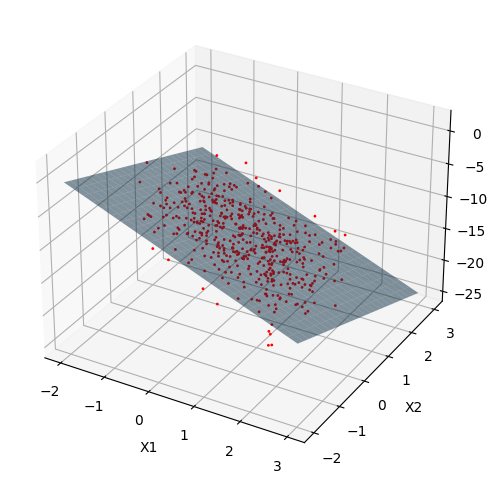

Red points are input data points: y


In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(x1, x2, y, color='red', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
#ax.view_init(elev=30, azim=220)
plt.show()

print("Red points are input data points: y")

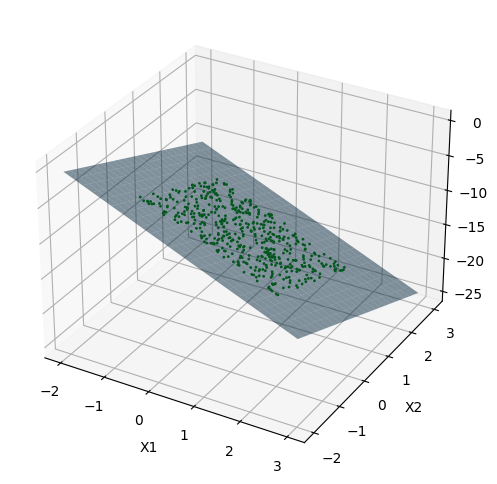

Green points are estimated (regressed) values (using Scikit-learn): y_hat   (on fitted plane)


In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(x1, x2, y_hat, color='green', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
#ax.view_init(elev=30, azim=220)
plt.show()

print("Green points are estimated (regressed) values (using Scikit-learn): y_hat   (on fitted plane)")

In [ ]:
# doing linear regression using Normal-Eqation  (note that we already constructed X_b and computed the w_estimate before)
y_hat = X_b.dot(w_estimate)

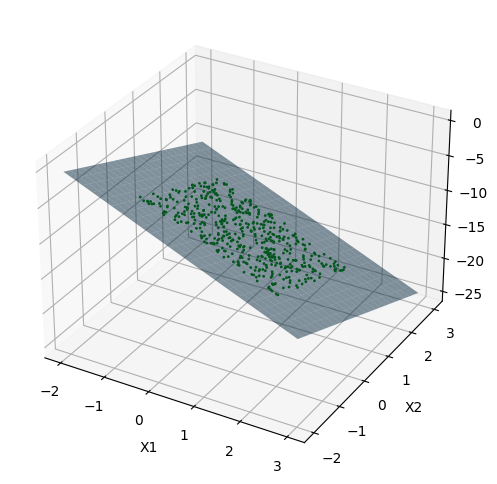

Green points are estimated (regressed) values (using Normal-Equation): y_hat   (on fitted plane)


In [ ]:
# plot the fitted data on a plane
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(x1, x2, y_hat, color='green', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
#ax.view_init(elev=30, azim=220)
plt.show()

print("Green points are estimated (regressed) values (using Normal-Equation): y_hat   (on fitted plane)")

# Outlier demo

1) Add outliers to data such that linear regression will not make a good fit
2) Show data on a 2D plane
3) Fit to data using Linear Regression
4) Show Linear Regression fitting in 3D
5) Show histogram of RSS values (choose proper bin count)
6) Use a proper regression method from Scikit-learn so that fitting is not affected from outliers
7) Show this robust fitting in 3D
8) Show histogram of RSS values (choose proper bin count)
9) Comment on your observations

In [ ]:
# 1) Add outliers to data such that linear regression will not make a good fit
for i in range(10) :
  y[n-i-1] = 400

10 outliers are added as value of 400 not less than since the effect of outliers are observable in a more precise way.

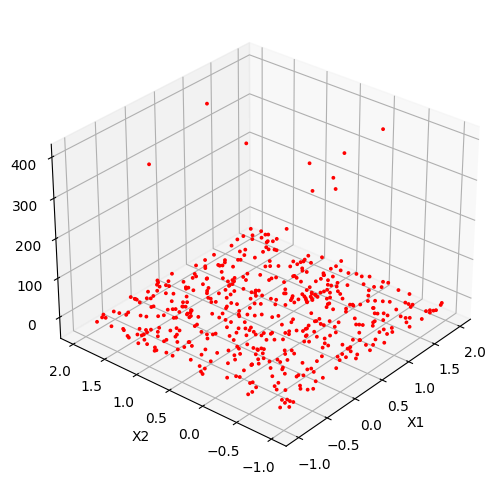

Red points are input data points after adding 10 outliers : y


In [ ]:
# 2) Show data on a 2D (3D ? ) plane
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='red', s=3, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.view_init(elev=30, azim=220)
plt.show()

print("Red points are input data points after adding 10 outliers : y")

In [ ]:
# 3) Fit the data using Linear regression
lin_reg_outlier = LinearRegression()
lin_reg_outlier.fit(X,y)

LinearRegression()

The dataset with outlears is fitted LinearRegression model.

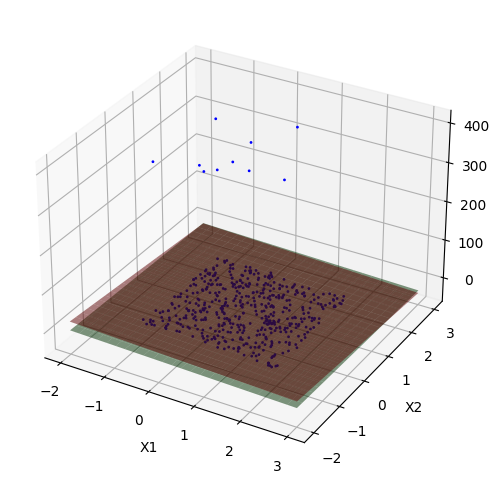

The green surface is old one and the red surface is new one and the blue points are the dataset with outliers


In [ ]:
#Fit to data using Linear Regression
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, color="green", alpha=0.5)

# new surface using with new linear model
zz_new = lin_reg_outlier.predict(X_g).reshape(m, m)
ax.plot_surface(xx, yy, zz_new, color = 'red', alpha=0.5)

ax.scatter(x1, x2, y, color='blue', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
plt.show()

print("The green surface is old one and the red surface is new one and the blue points are the dataset with outliers")

Above plot shows the green surface is predicted X_grid using (Scitkit-learn) linear model before adding outliers and the red surface is predicted X_grid using new linear model after adding outlier. The blue points are the our dataset. As you see, the red surface is getten close to aoutliers data if we add them into dataset the predicted values would change.

Since the dataset and other parameters have been generated with random values, it is expexted that the results and plots may vary across different runs.


In [ ]:
# y_hat_outlier is predicted using outlier liear model.
y_hat_outlier = lin_reg_outlier.predict(X)

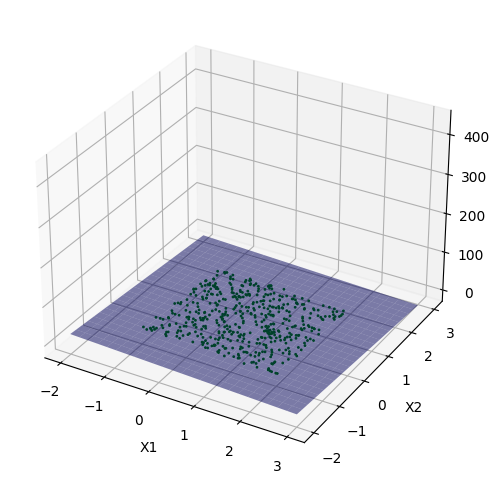

Green points are estimated (regressed) values (using Scikit-learn): y_hat_outlier   (on fitted plane)


In [ ]:
# 4) Show Linear Regression fitting in 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz_new,color = 'blue', alpha=0.5)
ax.scatter(x1, x2, y_hat_outlier, color='green', s=1, alpha=1)
ax.set_zlim(-20,450)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
plt.show()

print("Green points are estimated (regressed) values (using Scikit-learn): y_hat_outlier   (on fitted plane)")

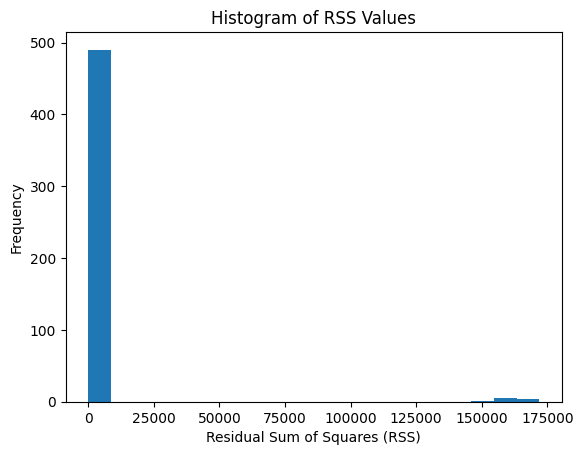

In [ ]:
# 5) Show histogram of RSS values (choose proper bin count)
rss_values = np.sum((y - y_hat_outlier)**2, axis=1)
plt.hist(rss_values, bins=20)
plt.xlabel('Residual Sum of Squares (RSS)')
plt.ylabel('Frequency')
plt.title('Histogram of RSS Values')
plt.show()

In [ ]:
# 6) Use a proper regression method from Scikit-learn so that fitting is not affected from outliers
from sklearn.linear_model import RANSACRegressor

ransac_reg = RANSACRegressor(estimator=LinearRegression())
ransac_reg.fit(X, y)

RANSACRegressor(estimator=LinearRegression())

Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method. It is a non-deterministic algorithm in the sense that it produces a reasonable result only with a certain probability, with this probability increasing as more iterations are allowed.(from  <a href="https://en.wikipedia.org/wiki/Random_sample_consensus">Wikipedia</a> )

The Linear Regresion is not good at outlier dataset then we have to use more rebost model for plane (or hyperplane). RANSACRegression (RANdom SAmple Consensus) is used but there are some model HuberRegression, TheilSenRegresor.    

The three algorithms use different strategies for managing outliers, yet all aim to produce more accurate results.


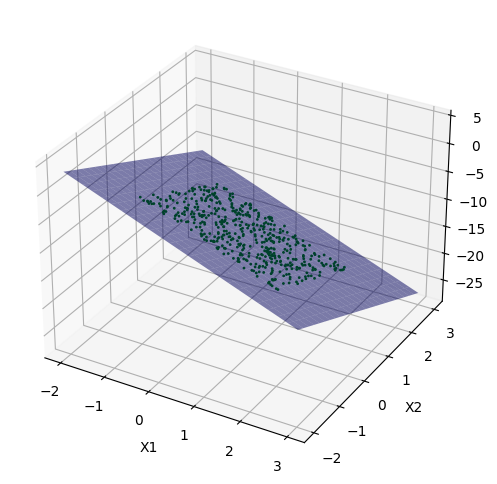

Green points are estimated (regressed) values (using Scikit-learn): y_hat_ransac (on fitted plane)


In [ ]:
# 7) Show this robust fitting in 3D
y_hat_ransac = ransac_reg.predict(X)
zz_ransac = ransac_reg.predict(X_g).reshape(m,m)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz_ransac,color = 'blue', alpha=0.5)
ax.scatter(x1, x2, y_hat_ransac, color='green', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
plt.show()

print("Green points are estimated (regressed) values (using Scikit-learn): y_hat_ransac (on fitted plane)")


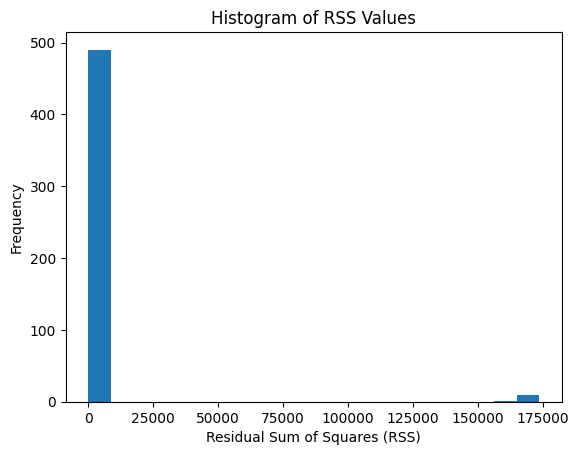

In [ ]:
# 8) Show histogram of RSS values (choose proper bin count)
rss_values = np.sum((y - y_hat_ransac)**2, axis=1)
plt.hist(rss_values, bins=20)
plt.xlabel('Residual Sum of Squares (RSS)')
plt.ylabel('Frequency')
plt.title('Histogram of RSS Values')
plt.show()

In this assignment, I set the value of 10 data as 400. If there were different outliers, the results above would probably distinct. But as a result, abnormal values in our dataset will change the result of the linear model. In this case, we need to visualize the dataset or look at its statistical data (mean, standard deviation etc.). In the following, rubost models should be used.